#**S1 : Business Understanding**

Building a predictive model that answers the question: “What sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

#**S2 : Analytic Approach**

####KNN 
####Decision tree
####SVM
####Logistic Regg

#**S3 : Data  Requirement & S4 : Data Collection**

Data from kaggle

#**S5 : Data Understanding**

Data understanding encompasses all activities related to constructing the data set. Read and understand the dataset given using Pandas libraries.

#**S6 : Data Preparation**

####Data Wrangling/Data cleaning
####EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl

print('all done')

all done


In [ ]:
df_test = pd.read_csv('test.csv') 
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [ ]:
df_test.shape

(418, 11)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
df = pd.read_csv('train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df1 = df.isnull()
df1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
missing_values = df1

for column in missing_values.columns.values.tolist():
    print (column)
    print (missing_values[column].value_counts())
    print ('')

PassengerId
False    891
Name: PassengerId, dtype: int64

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Name
False    891
Name: Name, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Ticket
False    891
Name: Ticket, dtype: int64

Fare
False    891
Name: Fare, dtype: int64

Cabin
True     687
False    204
Name: Cabin, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64



In [ ]:
df1.sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Columns age, cabin and embarked have missing values


#**Feature engineering : Cabin**

Train data


In [ ]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
df2 = df
df2['Cabin_initial'] = df.Cabin.apply(lambda x: str(x)[0])
df2['Cabin_initial'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_initial, dtype: int64

In [ ]:
df2.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,n


In [ ]:
#to locate spesific index for cabin_initial T
#drop row with cabin_initial T to remove outlier
new_df = df2.loc[df2['Cabin_initial'].str.startswith('T')].copy()
print (new_df)

     PassengerId  Survived  Pclass                          Name   Sex   Age  \
339          340         0       1  Blackwell, Mr. Stephen Weart  male  45.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked Cabin_initial  
339      0      0  113784  35.5     T        S             T  


In [ ]:
df3 = df2.drop(339)
print(df3.loc[339].head())
# the error to print row with index 339 because index 339 has been dropped

KeyError: ignored

In [ ]:
print (df3.loc[340].head())

PassengerId                               341
Survived                                    1
Pclass                                      2
Name           Navratil, Master. Edmond Roger
Sex                                      male
Name: 340, dtype: object


In [ ]:
cabin = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "n": 8}
df3['Cabin_initial'] = df3['Cabin_initial'].map(cabin)
df3['Cabin_initial'].value_counts()

8    687
3     59
2     47
4     33
5     32
1     15
6     13
7      4
Name: Cabin_initial, dtype: int64

In [ ]:
df3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_initial'],
      dtype='object')

Test data


In [ ]:
df2_test = df_test   
df2_test['Cabin_initial'] = df_test.Cabin.apply(lambda x: str(x)[0])
df2_test['Cabin_initial'].value_counts()

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin_initial, dtype: int64

In [ ]:
cabin_test = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "n": 8}
df2_test['Cabin_initial'] = df2_test['Cabin_initial'].map(cabin_test)
df2_test['Cabin_initial'].value_counts()

8    327
3     35
2     18
4     13
5      9
6      8
1      7
7      1
Name: Cabin_initial, dtype: int64

#**Feature Engineering : Name**

Train data

In [ ]:
df4 = df3
df4['Salutation'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
df4['Salutation'].value_counts()

Mr              516
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Salutation, dtype: int64

In [ ]:
df4['Salutation'] = df4['Salutation'].replace('Mlle', 'Miss')
df4['Salutation'] = df4['Salutation'].replace('Ms', 'Miss')
df4['Salutation'] = df4['Salutation'].replace('Mme', 'Mrs')
df4['Salutation'].value_counts()

Mr              516
Miss            185
Mrs             126
Master           40
Dr                7
Rev               6
Major             2
Col               2
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: Salutation, dtype: int64

In [ ]:
df4['Salutation'] = df4['Salutation'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
df4['Salutation'].value_counts()

Mr        516
Miss      185
Mrs       126
Master     40
Others     23
Name: Salutation, dtype: int64

In [ ]:
 titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}
 df4['Salutation'] = df4['Salutation'].map(titles)
 df4['Salutation'].value_counts()

1    516
2    185
3    126
4     40
5     23
Name: Salutation, dtype: int64

In [ ]:
df4.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_initial,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,8,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,3


Test data

In [ ]:
df4_test = df2_test
df4_test['Salutation'] = df_test.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
df4_test['Salutation'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Salutation, dtype: int64

In [ ]:
df4_test['Salutation'] = df4_test['Salutation'].replace('Ms', 'Miss')
df4_test['Salutation'] = df4_test['Salutation'].replace(['Col', 'Dr',\
                                             'Rev', 'Sir', 'Dona'], 'Others')

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}
df4_test['Salutation'] = df4_test['Salutation'].map(titles)
df4_test['Salutation'].value_counts()

1    240
2     79
3     72
4     21
5      6
Name: Salutation, dtype: int64

#**Feature engineering : Age**

Train data

In [ ]:
for dataset in df4:
    mean = df4["Age"].mean()
    std = df4["Age"].std()
    null = df4["Age"].isnull().sum()
    # compute random numbers between the mean, std and null
    rand_age = np.random.randint(mean - std, mean + std, size = null)
    # fill NaN values in Age column with random values generated
    age_slice = df4["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    df4["Age"] = age_slice
    df4["Age"] = df4["Age"].astype(int)

df4["Age"].isnull().sum()
#to check if there is still a missing values present

0

Another way to fill in the missing values for age. Fill in with random number of mean-std

In [ ]:
bins_age = np.linspace(min(df4["Age"]), max(df4["Age"]), 7)
bins_age

array([ 0.        , 13.33333333, 26.66666667, 40.        , 53.33333333,
       66.66666667, 80.        ])

In [ ]:
categories_names = [0, 1, 2, 3, 4, 5]

df4['age_binned'] = pd.cut(df4['Age'], bins_age, labels=categories_names, include_lowest=True )
print (bins_age, ':', df4['age_binned'].value_counts())



[ 0.         13.33333333 26.66666667 40.         53.33333333 66.66666667
 80.        ] : 2    341
1    313
3    115
0     71
4     43
5      7
Name: age_binned, dtype: int64


Test data

In [ ]:
for dataset in df4_test:
    mean = df4_test["Age"].mean()
    std = df4_test["Age"].std()
    null = df4_test["Age"].isnull().sum()
    # compute random numbers between the mean, std and null
    rand_age_test = np.random.randint(mean - std, mean + std, size = null)
    # fill NaN values in Age column with random values generated
    age_slice_test = df4_test["Age"].copy()
    age_slice_test[np.isnan(age_slice_test)] = rand_age_test
    df4_test["Age"] = age_slice_test
    df4_test["Age"] = df4_test["Age"].astype(int)

df4_test["Age"].isnull().sum()

0

In [ ]:
bins_age_test = np.linspace(min(df4_test["Age"]), max(df4_test["Age"]), 7)
bins_age_test

array([ 0.        , 12.66666667, 25.33333333, 38.        , 50.66666667,
       63.33333333, 76.        ])

In [ ]:
categories_names = [0, 1, 2, 3, 4, 5]

df4_test['age_binned'] = pd.cut(df4_test['Age'], bins_age_test, labels=categories_names, include_lowest=True )
print (bins_age_test, ':', df4_test['age_binned'].value_counts())

[ 0.         12.66666667 25.33333333 38.         50.66666667 63.33333333
 76.        ] : 1    149
2    142
3     71
4     26
0     25
5      5
Name: age_binned, dtype: int64


#**Feature engineering : Sex**

Train data

In [ ]:
 gender = {"male": 0, "female": 1}
 df4['Sex'] = df4['Sex'].map(gender)
 df4['Sex'].value_counts()

0    576
1    314
Name: Sex, dtype: int64

Test data

In [ ]:
df4_test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
 gender = {"male": 0, "female": 1}
 df4_test['Sex'] = df4_test['Sex'].map(gender)
 df4_test['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

#**Feature engineering : SibSp & Parch**

Train data

In [ ]:
print (df4['Parch'].value_counts())
print (df4['SibSp'].value_counts())

0    677
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
0    607
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [ ]:
df5 = df4
sum_column = df4["SibSp"] + df["Parch"] + 1
df5["Family"] = sum_column
print(df5.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_initial',
       'Salutation', 'age_binned', 'Family'],
      dtype='object')


In [ ]:
df5['Singleton'] = df5['Family'].map(lambda s: 1 if s == 1 else 0)
df5['SmallFamily'] = df5['Family'].map(lambda s: 1 if 2 <= s <= 4 else 0)
df5['LargeFamily'] = df5['Family'].map(lambda s: 1 if 5 <= s else 0)

df5.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_initial',
       'Salutation', 'age_binned', 'Family', 'Singleton', 'SmallFamily',
       'LargeFamily'],
      dtype='object')

In [ ]:
df5.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_initial,Salutation,age_binned,Family,Singleton,SmallFamily,LargeFamily
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,8,1,1,2.0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,3,3,2,2.0,0,1,0


Test data

In [ ]:
df5_test = df4_test
sum_column_test = df_test["SibSp"] + df_test["Parch"] + 1
df5_test["Family"] = sum_column_test
df5_test['Family'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: Family, dtype: int64

In [ ]:
df5_test['Singleton'] = df5_test['Family'].map(lambda s: 1 if s == 1 else 0)
df5_test['SmallFamily'] = df5_test['Family'].map(lambda s: 1 if 2 <= s <= 4 else 0)
df5_test['LargeFamily'] = df5_test['Family'].map(lambda s: 1 if 5 <= s else 0)

df5_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_initial', 'Salutation',
       'age_binned', 'Family', 'Singleton', 'SmallFamily', 'LargeFamily'],
      dtype='object')

#**Feature Engineering : Ticket**

Train data

In [ ]:
df6 = df5
df6['numeric_ticket'] = df5['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
df6['ticket_letters'] = df5['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1])
                                            .replace('.','').replace('/','')
                                            .lower() if len(x.split(' ')[:-1]) >0 else 0)

df6.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_initial',
       'Salutation', 'age_binned', 'Family', 'Singleton', 'SmallFamily',
       'LargeFamily', 'numeric_ticket', 'ticket_letters'],
      dtype='object')

In [ ]:
df6.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Cabin_initial,Salutation,age_binned,Family,Singleton,SmallFamily,LargeFamily,numeric_ticket,ticket_letters
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,...,S,8,1,1,2.0,0,1,0,0,a5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,...,C,3,3,2,2.0,0,1,0,0,pc


In [ ]:
df6['numeric_ticket'].value_counts()

1    660
0    230
Name: numeric_ticket, dtype: int64

In [ ]:
df6['ticket_letters'].value_counts()

0            664
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [ ]:
df6.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_initial,Salutation,Family,Singleton,SmallFamily,LargeFamily,numeric_ticket
PassengerId,1.000000,-0.005375,-0.035922,-0.043298,0.026615,-0.057759,-0.001872,0.012690,-0.032640,0.003552,-0.040414,0.057865,-0.029311,-0.057189,0.072586
Survived,-0.005375,1.000000,-0.340458,0.543053,-0.055942,-0.035760,0.081248,0.257456,-0.294497,0.407383,0.016150,-0.202793,0.279410,-0.125439,0.002016
Pclass,-0.035922,-0.340458,1.000000,-0.133423,-0.311909,0.082370,0.017636,-0.550143,0.745289,-0.175465,0.065111,0.136875,-0.225152,0.152100,0.080929
Sex,-0.043298,0.543053,-0.133423,1.000000,-0.065374,0.114287,0.245202,0.182444,-0.117911,0.502422,0.200620,-0.303178,0.260319,0.102763,0.033012
Age,0.026615,-0.055942,-0.311909,-0.065374,1.000000,-0.207877,-0.163555,0.096685,-0.249749,-0.082128,-0.223798,0.161058,-0.066669,-0.186681,-0.042377
SibSp,-0.057759,-0.035760,0.082370,0.114287,-0.207877,1.000000,0.414690,0.159707,0.041618,0.269355,0.890683,-0.584329,0.212938,0.730669,-0.080479
Parch,-0.001872,0.081248,0.017636,0.245202,-0.163555,0.414690,1.000000,0.216288,-0.031044,0.315536,0.783049,-0.583255,0.265598,0.631484,-0.035460
Fare,0.012690,0.257456,-0.550143,0.182444,0.096685,0.159707,0.216288,1.000000,-0.526111,0.136402,0.217219,-0.271994,0.205636,0.143663,-0.173248
Cabin_initial,-0.032640,-0.294497,0.745289,-0.117911,-0.249749,0.041618,-0.031044,-0.526111,1.000000,-0.131569,0.012936,0.137119,-0.181810,0.071696,0.012550
Salutation,0.003552,0.407383,-0.175465,0.502422,-0.082128,0.269355,0.315536,0.136402,-0.131569,1.000000,0.341749,-0.405432,0.302275,0.221969,0.036687


After done some feature engineering to the ticket, the ticket still has low correlation with the Survived column. Hence, drop the ticket.

#**Feature engineering : Fare**

Train data

In [ ]:
bins_fare = np.linspace(min(df["Fare"]), max(df["Fare"]), 7)
bins_fare

array([  0.    ,  85.3882, 170.7764, 256.1646, 341.5528, 426.941 ,
       512.3292])

In [ ]:
categories_name = [0, 1, 2, 3, 4, 5]

df6['fare_binned'] = pd.cut(df['Fare'], bins_fare, labels=categories_name, include_lowest=True )
print (bins_fare, ':', df6['fare_binned'].value_counts())

[  0.      85.3882 170.7764 256.1646 341.5528 426.941  512.3292] : 0    824
1     46
2     11
3      6
5      3
4      0
Name: fare_binned, dtype: int64


Test data

In [ ]:
df6_test = df5_test
for dataset in df6_test:
    mean = df_test["Fare"].mean()
    std = df_test["Fare"].std()
    null = df_test["Fare"].isnull().sum()
    # compute random numbers between the mean, std and null
    rand_fare_test = np.random.randint(mean - std, mean + std, size = null)
    # fill NaN values in Age column with random values generated
    fare_slice_test = df["Fare"].copy()
    fare_slice_test[np.isnan(fare_slice_test)] = rand_fare_test
    df6_test["Fare"] = fare_slice_test
    df6_test["Fare"] = df6_test["Fare"].astype(int)

df6_test["Fare"].isnull().sum()
#to check if there is still a missing values present

0

In [ ]:
bins_fare_test = np.linspace(min(df6_test["Fare"]), max(df6_test["Fare"]), 7)
bins_fare_test

array([  0.        ,  85.33333333, 170.66666667, 256.        ,
       341.33333333, 426.66666667, 512.        ])

In [ ]:
categories_name = [0, 1, 2, 3, 4, 5]

df6_test['fare_binned'] = pd.cut(df_test['Fare'], bins_fare_test, labels=categories_name, include_lowest=True )
print (bins_fare_test, ':', df6_test['fare_binned'].value_counts())

[  0.          85.33333333 170.66666667 256.         341.33333333
 426.66666667 512.        ] : 0    386
1     23
2      4
3      4
5      1
4      0
Name: fare_binned, dtype: int64


#**Feature engineering : Embarked**

Train data

In [ ]:
new_df7= df6
common_value = 'S'
new_df7['Embarked'] = new_df7['Embarked'].fillna(common_value)
new_df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     890 non-null    int64   
 1   Survived        890 non-null    int64   
 2   Pclass          890 non-null    int64   
 3   Name            890 non-null    object  
 4   Sex             890 non-null    int64   
 5   Age             890 non-null    int64   
 6   SibSp           890 non-null    int64   
 7   Parch           890 non-null    int64   
 8   Ticket          890 non-null    object  
 9   Fare            890 non-null    float64 
 10  Cabin           203 non-null    object  
 11  Embarked        890 non-null    object  
 12  Cabin_initial   890 non-null    int64   
 13  Salutation      890 non-null    int64   
 14  age_binned      890 non-null    category
 15  Family          890 non-null    float64 
 16  Singleton       890 non-null    int64   
 17  SmallFamily     

In [ ]:
embark = {"S": 0, "C": 1, "Q": 2}
new_df7['Embarked'] = new_df7['Embarked'].map(embark)
new_df7['Embarked'].value_counts()

0    645
1    168
2     77
Name: Embarked, dtype: int64

Test data

In [ ]:
df6_test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
df6_test_trial = df6_test
embark = {"S": 0, "C": 1, "Q":2}
df6_test_trial['Embarked'] = df6_test_trial['Embarked'].map(embark)
df6_test_trial['Embarked'].value_counts()
                                             

0    270
1    102
2     46
Name: Embarked, dtype: int64

#**Future Work**

#####Cabin_initial : drop row 339. convert initial to numerical
#####Name : Split Mr, Mrs and make new column Salutation
#####Sex : Change male, female to numerical 
#####Age : create column age_cat categorized into 6 group
#####*SibSp & Parch : create column Family from addition of SibSp & Parch*
#####*Ticket : drop whole column*
#####*Fare : create column fare_cat *categorized into 6 group *italicized text*
#####*Embarked : create column *embarked_cat categorized into 3 group *italicized text* 



In [ ]:
new_df7.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_initial,Salutation,Family,Singleton,SmallFamily,LargeFamily,numeric_ticket
PassengerId,1.000000,-0.005375,-0.035922,-0.043298,0.026615,-0.057759,-0.001872,0.012690,-0.030739,-0.032640,0.003552,-0.040414,0.057865,-0.029311,-0.057189,0.072586
Survived,-0.005375,1.000000,-0.340458,0.543053,-0.055942,-0.035760,0.081248,0.257456,0.106363,-0.294497,0.407383,0.016150,-0.202793,0.279410,-0.125439,0.002016
Pclass,-0.035922,-0.340458,1.000000,-0.133423,-0.311909,0.082370,0.017636,-0.550143,0.044771,0.745289,-0.175465,0.065111,0.136875,-0.225152,0.152100,0.080929
Sex,-0.043298,0.543053,-0.133423,1.000000,-0.065374,0.114287,0.245202,0.182444,0.116155,-0.117911,0.502422,0.200620,-0.303178,0.260319,0.102763,0.033012
Age,0.026615,-0.055942,-0.311909,-0.065374,1.000000,-0.207877,-0.163555,0.096685,-0.010872,-0.249749,-0.082128,-0.223798,0.161058,-0.066669,-0.186681,-0.042377
SibSp,-0.057759,-0.035760,0.082370,0.114287,-0.207877,1.000000,0.414690,0.159707,-0.060283,0.041618,0.269355,0.890683,-0.584329,0.212938,0.730669,-0.080479
Parch,-0.001872,0.081248,0.017636,0.245202,-0.163555,0.414690,1.000000,0.216288,-0.078992,-0.031044,0.315536,0.783049,-0.583255,0.265598,0.631484,-0.035460
Fare,0.012690,0.257456,-0.550143,0.182444,0.096685,0.159707,0.216288,1.000000,0.062195,-0.526111,0.136402,0.217219,-0.271994,0.205636,0.143663,-0.173248
Embarked,-0.030739,0.106363,0.044771,0.116155,-0.010872,-0.060283,-0.078992,0.062195,1.000000,-0.038519,0.044969,-0.080669,0.018337,0.020164,-0.072440,0.081630
Cabin_initial,-0.032640,-0.294497,0.745289,-0.117911,-0.249749,0.041618,-0.031044,-0.526111,-0.038519,1.000000,-0.131569,0.012936,0.137119,-0.181810,0.071696,0.012550


In [ ]:
new_df7.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_initial',
       'Salutation', 'age_binned', 'Family', 'Singleton', 'SmallFamily',
       'LargeFamily', 'numeric_ticket', 'ticket_letters', 'fare_binned'],
      dtype='object')

#**Ready data**

Train data

In [ ]:
df8 = new_df7[['Pclass', 'Sex', 'SibSp',
       'Parch', 'Embarked', 'Cabin_initial',
       'Salutation', 'age_binned', 'Singleton', 'SmallFamily',
       'LargeFamily', 'fare_binned']]
df8.head()

,Pclass,Sex,SibSp,Parch,Embarked,Cabin_initial,Salutation,age_binned,Singleton,SmallFamily,LargeFamily,fare_binned
0,3,0,1,0,0,8,1,1,0,1,0,0
1,1,1,1,0,1,3,3,2,0,1,0,0
2,3,1,0,0,0,8,2,1,1,0,0,0
3,1,1,1,0,0,3,3,2,0,1,0,0
4,3,0,0,0,0,8,1,2,1,0,0,0


Test data

In [ ]:
df8_test = df6_test_trial[['Pclass', 'Sex', 'SibSp',
       'Parch', 'Embarked', 'Cabin_initial',
       'Salutation', 'age_binned', 'Singleton', 'SmallFamily',
       'LargeFamily', 'fare_binned']]

df8_test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Cabin_initial,Salutation,age_binned,Singleton,SmallFamily,LargeFamily,fare_binned
0,3,0,0,0,2,8,1,2,1,0,0,0
1,3,1,1,0,0,8,3,3,0,1,0,0
2,2,0,0,0,2,8,1,4,1,0,0,0
3,3,0,0,0,0,8,1,2,1,0,0,0
4,3,1,1,1,0,8,3,1,0,1,0,0


#**S7 : Data Modelling**

In [ ]:
#import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

print ('All done')

All done


In [ ]:
# Model Preprocessing.

X = df8
y = df6["Survived"]
val  = df8_test

In [ ]:
# Split the dataset to train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 , 
                                  random_state = 42, stratify = y)

In [ ]:
#logistic regression

# Define param grid
lr_param_grid = {'fit_intercept': [True,False],
                 'C': [0.001, 0.004, 0.01, 0.1, 1],
                 'penalty' : ['l1', 'l2']}

logr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                    lr_param_grid, scoring='roc_auc', cv=5, return_train_score=True)

# Fit the data to gridsearchCV
logr_grid.fit(X_train, y_train)

# Show best parameters
print("Logistic Regression best parameters: ",logr_grid.best_params_)

# Define Logistic Regression with best estimator
logr_model = logr_grid.best_estimator_
print("Logistic Regression Training best scores: ",logr_grid.best_score_)

Logistic Regression best parameters:  {'C': 1, 'fit_intercept': True, 'penalty': 'l1'}
Logistic Regression Training best scores:  0.859895641499892


In [ ]:
#Linear Support Vector Machine:

from sklearn.svm import SVC

svc_param_grid = {'C': [0.001, 0.004, 0.01, 0.1, 1],
                  'kernel' : ['linear', 'rbf', 'poly'],
                  'gamma' : [0.001, 0.004, 0.01, 0.1, 1]
                 }

svc_grid = GridSearchCV(SVC(), 
                    svc_param_grid, scoring='roc_auc', cv=5, return_train_score=True)

svc_grid.fit(X_train, y_train)
print("SVC best parameters: ",svc_grid.best_params_)
svc_model = svc_grid.best_estimator_
print("SVC Training best scores: ",svc_grid.best_score_)


SVC best parameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
SVC Training best scores:  0.8642450665702208


In [ ]:
#decision tree

# Define param grid
dt_param_grid = {'max_depth': np.arange(1,10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                    dt_param_grid, scoring='roc_auc', cv=5, return_train_score=True)

# Fit the data to gridsearchCV
dt_grid.fit(X_train, y_train)

# Show best parameters
print("Decision Tree best parameters: ",dt_grid.best_params_)

# Define Decision Tree with best estimator
dt_model = dt_grid.best_estimator_
print("Decision Tree Training best scores: ",dt_grid.best_score_)


Decision Tree best parameters:  {'max_depth': 3}
Decision Tree Training best scores:  0.850957006483056


In [ ]:
#KNN

# KNN Classifier

#define param grid
knn_param_grid = {'n_neighbors': np.arange(1, 10),
              'p': [1,2],
              'weights': ['uniform','distance']}

knn_grid = GridSearchCV(KNeighborsClassifier(), 
                    knn_param_grid, scoring='roc_auc', cv=5, return_train_score=True)

#fit the data to gridsearchCV
knn_grid.fit(X_train, y_train)

#Show best parameters
print("KNN Best Parameters", knn_grid.best_params_)

#Define KNN with best estimator
knn_model = knn_grid.best_estimator_
print("K-Nearest Neighbour Training best scores: ",knn_grid.best_score_)


KNN Best Parameters {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
K-Nearest Neighbour Training best scores:  0.8481032229569418


In [ ]:
#polynomial logistic regression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_pipeline = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                             MinMaxScaler(),
                             LogisticRegression())
poly_pipeline

pip_param_grid = {'polynomialfeatures__degree':[1,2,3],
                 'logisticregression__C':[0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100],
                 'logisticregression__penalty':['l1','l2'],
                 'logisticregression__solver':['liblinear'],
                 'logisticregression__fit_intercept':[True,False]}

pip_grid = GridSearchCV(poly_pipeline, pip_param_grid, cv=5, scoring='roc_auc', 
                        return_train_score=True)
pip_grid.fit(X_train, y_train)
print("Logistic Regression Polynomial best parameters: ",pip_grid.best_params_)
pip_model = pip_grid.best_estimator_
print("Logistic Regression Polynomial best scores: ",pip_grid.best_score_)

Logistic Regression Polynomial best parameters:  {'logisticregression__C': 0.4, 'logisticregression__fit_intercept': False, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear', 'polynomialfeatures__degree': 3}
Logistic Regression Polynomial best scores:  0.8727189854218775


#**S8 : Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
knn_pred = knn_model.predict(X_test)
print("Knn Best model confusion matrix on test data \n", confusion_matrix(y_test, knn_pred))
print("*****************************************")
print("Knn Best model Precision score on test data = {:.5f}".format(precision_score(y_test, knn_pred)))
print("Knn Best model Recall score on test data = {:.5f}".format(recall_score(y_test, knn_pred)))
print("Knn Best model F1 score on test data = {:.5f}".format(f1_score(y_test, knn_pred)))
print("Knn Best model Accuracy score on test data = {:.5f}".format(accuracy_score(y_test, knn_pred)))
print("*****************************************")
print(classification_report(y_test, knn_pred))

Knn Best model confusion matrix on test data 
 [[122  15]
 [ 31  55]]
*****************************************
Knn Best model Precision score on test data = 0.78571
Knn Best model Recall score on test data = 0.63953
Knn Best model F1 score on test data = 0.70513
Knn Best model Accuracy score on test data = 0.79372
*****************************************
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       137
           1       0.79      0.64      0.71        86

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



In [ ]:
dt_pred = dt_model.predict(X_test)
print("DT Best model confusion matrix on test data \n", confusion_matrix(y_test, dt_pred))
print("*****************************************")
print("DT Best model Precision score on test data = {:.5f}".format(precision_score(y_test, dt_pred)))
print("DT Best model Recall score on test data = {:.5f}".format(recall_score(y_test, dt_pred)))
print("DT Best model F1 score on test data = {:.5f}".format(f1_score(y_test, dt_pred)))
print("Dt Best model Accuracy score on test data = {:.5f}".format(accuracy_score(y_test, dt_pred)))
print("*****************************************")
print(classification_report(y_test, dt_pred))

DT Best model confusion matrix on test data 
 [[118  19]
 [ 24  62]]
*****************************************
DT Best model Precision score on test data = 0.76543
DT Best model Recall score on test data = 0.72093
DT Best model F1 score on test data = 0.74251
Dt Best model Accuracy score on test data = 0.80717
*****************************************
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       137
           1       0.77      0.72      0.74        86

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



In [ ]:
logr_pred = logr_model.predict(X_test)
print("LR Best model confusion matrix on test data \n", confusion_matrix(y_test, logr_pred))
print("*****************************************")
print("LR Best model Precision score on test data = {:.5f}".format(precision_score(y_test, logr_pred)))
print("LR Best model Recall score on test data = {:.5f}".format(recall_score(y_test, logr_pred)))
print("LR Best model F1 score on test data = {:.5f}".format(f1_score(y_test, logr_pred)))
print("LR Best model Accuracy score on test data = {:.5f}".format(accuracy_score(y_test, logr_pred)))
print("*****************************************")
print(classification_report(y_test, logr_pred))

LR Best model confusion matrix on test data 
 [[116  21]
 [ 24  62]]
*****************************************
LR Best model Precision score on test data = 0.74699
LR Best model Recall score on test data = 0.72093
LR Best model F1 score on test data = 0.73373
LR Best model Accuracy score on test data = 0.79821
*****************************************
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       137
           1       0.75      0.72      0.73        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



In [ ]:
svc_pred = svc_model.predict(X_test)
print("SVC Best model confusion matrix on test data \n", confusion_matrix(y_test, svc_pred))
print("*****************************************")
print("SVC Best model Precision score on test data = {:.5f}".format(precision_score(y_test, svc_pred)))
print("SVC Best model Recall score on test data = {:.5f}".format(recall_score(y_test, svc_pred)))
print("SVC Best model F1 score on test data = {:.5f}".format(f1_score(y_test, svc_pred)))
print("SVC Best model Accuracy score on test data = {:.5f}".format(accuracy_score(y_test, svc_pred)))
print(classification_report(y_test, svc_pred))

SVC Best model confusion matrix on test data 
 [[118  19]
 [ 24  62]]
*****************************************
SVC Best model Precision score on test data = 0.76543
SVC Best model Recall score on test data = 0.72093
SVC Best model F1 score on test data = 0.74251
SVC Best model Accuracy score on test data = 0.80717
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       137
           1       0.77      0.72      0.74        86

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



In [ ]:
pip_pred = pip_model.predict(X_test)
print("PIP Best model confusion matrix on test data \n", confusion_matrix(y_test, pip_pred))
print("*****************************************")
print("PIP Best model Precision score on test data = {:.5f}".format(precision_score(y_test, pip_pred)))
print("PIP Best model Recall score on test data = {:.5f}".format(recall_score(y_test, pip_pred)))
print("PIP Best model F1 score on test data = {:.5f}".format(f1_score(y_test, pip_pred)))
print("PIP Best model Accuracy score on test data = {:.5f}".format(accuracy_score(y_test, pip_pred)))
print(classification_report(y_test, pip_pred))

PIP Best model confusion matrix on test data 
 [[119  18]
 [ 27  59]]
*****************************************
PIP Best model Precision score on test data = 0.76623
PIP Best model Recall score on test data = 0.68605
PIP Best model F1 score on test data = 0.72393
PIP Best model Accuracy score on test data = 0.79821
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       137
           1       0.77      0.69      0.72        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



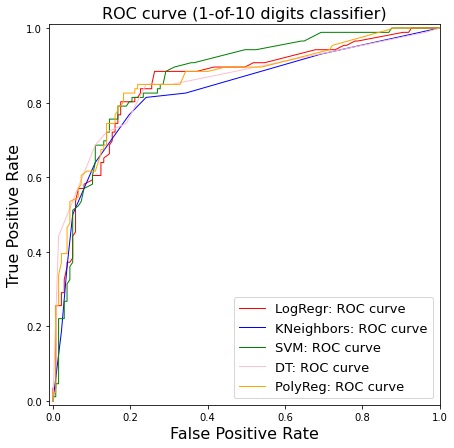

In [ ]:
from sklearn.metrics import roc_curve


y_scores_logr = logr_grid.fit(X_train, y_train).decision_function(X_test)


y_proba_knn = knn_grid.fit(X_train, y_train).predict_proba(X_test)


y_scores_svc = svc_grid.fit(X_train, y_train).decision_function(X_test)


y_scores_pip = pip_grid.fit(X_train, y_train).decision_function(X_test)

y_proba_dt = dt_grid.fit(X_train, y_train).predict_proba(X_test)


fpr_logr, tpr_logr, _ = roc_curve(y_test, y_scores_logr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn[:,1])
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_scores_svc)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt[:,1])
fpr_pip, tpr_pip, _ = roc_curve(y_test, y_scores_pip)


plt.figure(figsize=(7,7))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])

plt.plot(fpr_logr, tpr_logr, lw=1, label='LogRegr: ROC curve', color='red')
plt.plot(fpr_knn, tpr_knn, lw=1, label='KNeighbors: ROC curve', color='blue')
plt.plot(fpr_svc, tpr_svc, lw=1, label='SVM: ROC curve', color='green')
plt.plot(fpr_dt, tpr_dt, lw=1, label='DT: ROC curve', color='pink')
plt.plot(fpr_pip, tpr_pip, lw=1, label='PolyReg: ROC curve', color='orange')

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

print("svc_roc =", roc_auc_score(y_test, y_scores_svc) )
print("dt_roc =", roc_auc_score(y_test,  y_proba_dt[:,1]) )
print("logr_roc =", roc_auc_score(y_test, y_scores_logr) )
print("pip_roc =", roc_auc_score(y_test, y_scores_pip) )
print("knn_roc =", roc_auc_score(y_test, y_proba_knn[:,1]) )

svc_roc = 0.8668307587845866
dt_roc = 0.8509166525207944
logr_roc = 0.8512985910711254
pip_roc = 0.8578764216601596
knn_roc = 0.8290612799185199


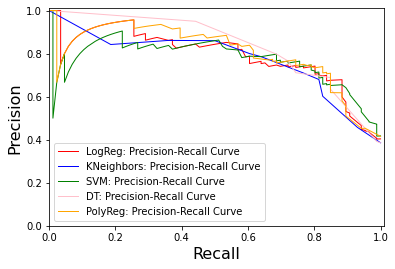

In [ ]:
from sklearn.metrics import precision_recall_curve

lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, y_scores_logr)
knn_precision, knn_recall, knn_thresholds = precision_recall_curve(y_test, y_proba_knn[:,1])
lsvm_precision, lsvm_recall, lsvm_thresholds = precision_recall_curve(y_test, y_scores_svc)
dt_precision, dt_recall, dt_thresholds = precision_recall_curve(y_test, y_proba_dt[:,1])
pip_precision, pip_recall, pip_thresholds = precision_recall_curve(y_test, y_scores_pip)

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(lr_recall , lr_precision, lw=1,  label='LogReg: Precision-Recall Curve', color='red')
plt.plot(knn_recall, knn_precision, lw=1, label='KNeighbors: Precision-Recall Curve', color='blue')
plt.plot(lsvm_recall, lsvm_precision, lw=1, label='SVM: Precision-Recall Curve', color='green')
plt.plot(dt_recall, dt_precision, lw=1, label='DT: Precision-Recall Curve', color='pink')
plt.plot(pip_recall, pip_precision, lw=1, label='PolyReg: Precision-Recall Curve', color='orange')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend(loc='lower left', fontsize=10)
# plt.axes().set_aspect('equal')
plt.show()

SVC and DT has the highest precision, recall, f1-score and accuracy.

SVC has the highest ROC value.

Hence, SVC model is choose from the other train models.